In [18]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import numpy as np
from scipy.stats import linregress
data = files.upload()

R^2 value: 0.33


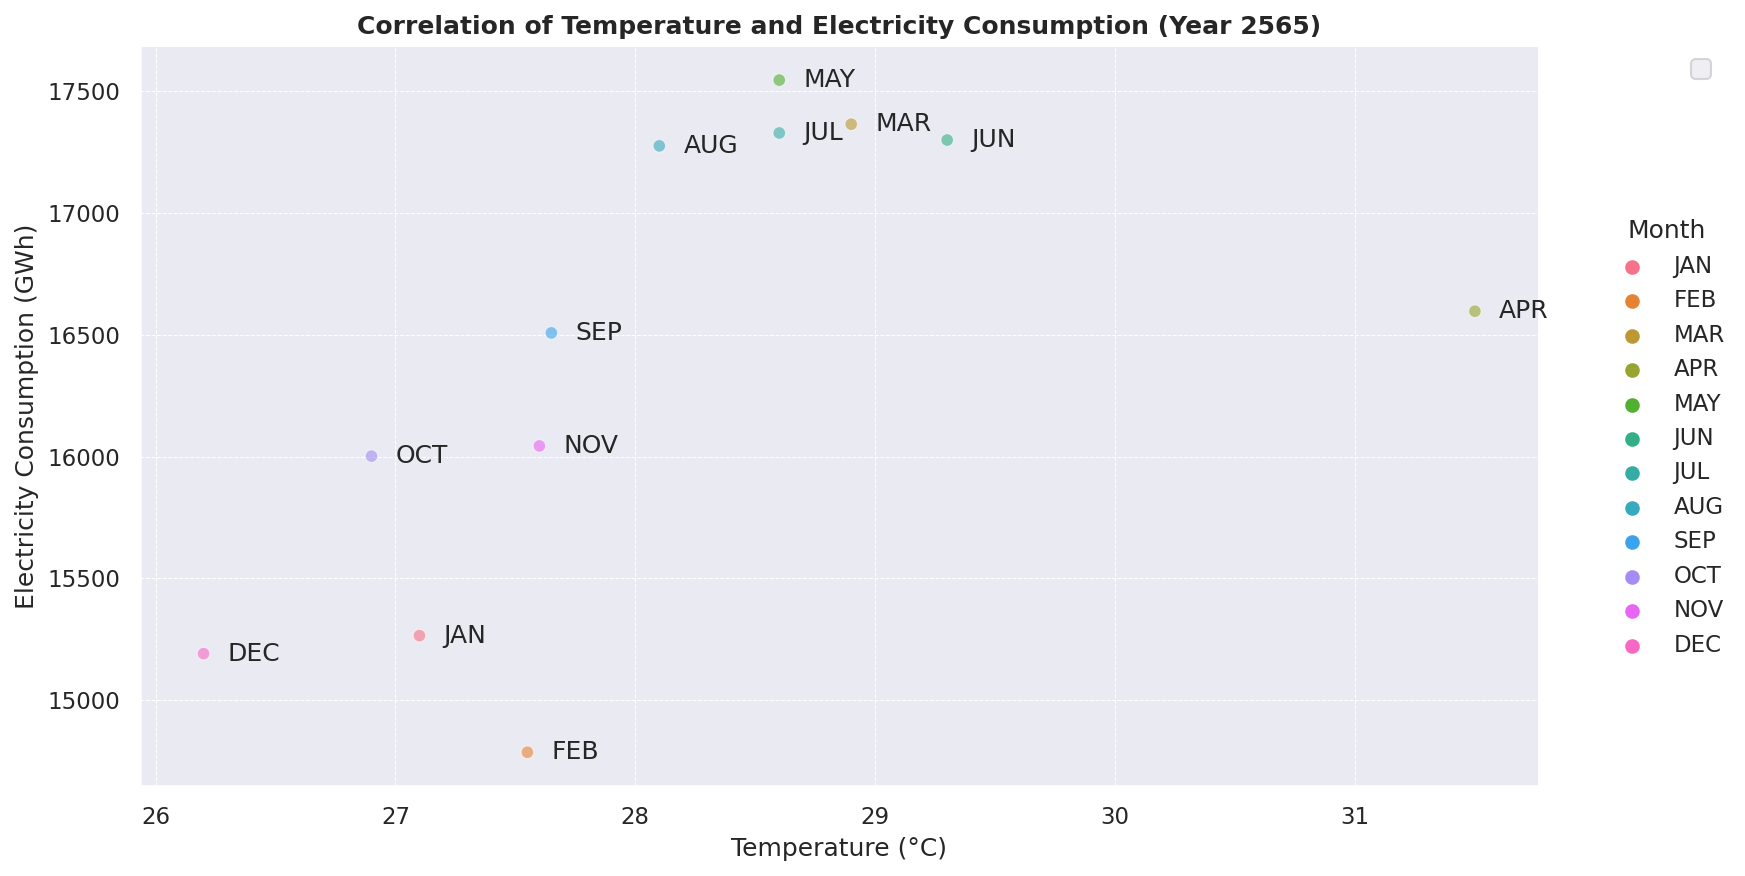

In [21]:
data = pd.read_csv('Temp.csv', index_col=0)

temperature_2565 = data.loc['Total', 'JAN':'DEC'].astype(float)
gwh_2565 = data.loc['GWh', 'JAN':'DEC'].astype(int)

df = pd.DataFrame({'Temperature (°C)': temperature_2565, 'Electricity Consumption (GWh)': gwh_2565, 'Month': temperature_2565.index})

# Plot
sns.set(rc={'figure.dpi': 150})
plot = sns.relplot(
    kind='scatter',
    data=df,
    x='Temperature (°C)', y='Electricity Consumption (GWh)',
    hue='Month',
    height=6, aspect=1.8,
    alpha=0.6,
)

for month, x, y in zip(df['Month'], df['Temperature (°C)'], df['Electricity Consumption (GWh)']):
    plt.text(x + 0.1, y, month, ha='left', va='center')

plt.title('Correlation of Temperature and Electricity Consumption (Year 2565)', fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend([],loc='upper left', bbox_to_anchor=(1.1, 1), fontsize=12)
plt.tight_layout()
slope, intercept, r_value, p_value, std_err = linregress(df['Temperature (°C)'], df['Electricity Consumption (GWh)'])
r_squared = r_value**2
print(f'R^2 value: {r_squared:.2f}')
plt.show()